In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

In [2]:
from imputation import imputed_vals, run, imputed_sqr_err
from utils.forgetter import forget_random_col_per_sample_2

In [3]:
seed = 42

In [4]:
random_state = np.random.RandomState(seed)
random_generator = np.random.default_rng(seed)

In [5]:
df = pd.read_csv("data/2-test_df.csv", index_col="Unnamed: 0")
df

,T3,FTI,TT4,age,T4U,TSH,psych,thyroid_surgery,goitre,tumor,sex,I131_treatment,on_thyroxine,lithium,sick,pregnant,on_antithyroid_meds
6364,0.3,77.0,68.0,49.0,0.88,68.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7417,1.9,119.0,99.0,73.0,0.83,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
982,1.3,128.0,109.0,62.0,0.85,0.1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2909,2.2,115.0,124.0,72.0,1.08,1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5633,2.0,119.0,136.0,63.0,1.14,1.4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4875,2.6,111.0,131.0,74.0,1.18,1.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3083,1.2,24.0,36.0,17.0,1.50,145.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1540,2.2,108.0,122.0,79.0,1.13,2.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5443,2.1,116.0,130.0,73.0,1.11,3.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
qualitative_cols_f = open('data/qualitative_cols.json', 'r')
categorical_cols_f = open('data/categorical_cols.json', 'r')

In [7]:
complete_vals_df = pd.read_csv("data/5-train_df.csv", index_col="Unnamed: 0") 
remove_vals_df = pd.read_csv("data/5-test_df.csv", index_col="Unnamed: 0") 
missing_vals_idxs = list(remove_vals_df.index)

In [8]:
sel_qual_cols = json.load(qualitative_cols_f)
sel_cat_cols = json.load(categorical_cols_f)

In [9]:
weight_map = {
    "age" : 1,
    "T3"  : 1,
    "T4U" : 1,
    "TSH" : 1,
    "TT4" : 1,
    "FTI" : 1
}

In [10]:
missing_vals_df, missing_col_map, missing_vals_idxs, picked_cols = forget_random_col_per_sample_2(remove_vals_df, weight_map, random_generator)

real_df = pd.concat([complete_vals_df, remove_vals_df])
curr_df = pd.concat([complete_vals_df, missing_vals_df])

In [11]:
neighbours = 10

In [12]:
knn_imputed_df, _ = run(real_df, curr_df, missing_vals_idxs, picked_cols, "kNN",
                        config={
                            "n_neighbors": neighbours
                        }, estimator_config={})
knn_imputed_df

,T3 (real),T3 (imputed),FTI (real),FTI (imputed),TT4 (real),TT4 (imputed),age (real),age (imputed),T4U (real),T4U (imputed),...,on_thyroxine (imputed),lithium (real),lithium (imputed),sick (real),sick (imputed),pregnant (real),pregnant (imputed),on_antithyroid_meds (real),on_antithyroid_meds (imputed),imputed
3196,0.5,0.5,153.0,153.000000,130.0,127.492874,76.0,76.000000,0.85,0.850000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TT4
1736,1.8,1.8,59.0,59.000000,81.0,81.000000,57.0,57.000000,1.38,1.197201,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T4U
1836,2.0,2.0,126.0,94.948841,79.0,79.000000,86.0,86.000000,0.62,0.620000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FTI
4819,2.3,2.3,72.0,72.000000,68.0,79.805834,37.0,37.000000,0.94,0.940000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TT4
4300,2.0,2.0,129.0,129.000000,152.0,152.000000,63.0,53.957550,1.18,1.180000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6266,1.8,1.8,97.0,97.000000,91.0,91.000000,39.0,59.181222,0.94,0.940000,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,age
8024,2.6,2.6,107.0,107.000000,95.0,95.000000,26.0,47.133477,0.89,0.890000,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,age
4111,2.3,2.3,67.0,67.000000,73.0,73.000000,24.0,24.000000,1.09,1.090000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TSH
2694,1.9,1.9,100.0,100.000000,87.0,87.000000,70.0,32.655057,0.87,0.870000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,age


In [13]:
wknn_imputed_df, _ = run(real_df, curr_df, missing_vals_idxs, picked_cols, "WkNN",
                         config={
                             "n_neighbors": neighbours
                         }, estimator_config={})
wknn_imputed_df

,T3 (real),T3 (imputed),FTI (real),FTI (imputed),TT4 (real),TT4 (imputed),age (real),age (imputed),T4U (real),T4U (imputed),...,on_thyroxine (imputed),lithium (real),lithium (imputed),sick (real),sick (imputed),pregnant (real),pregnant (imputed),on_antithyroid_meds (real),on_antithyroid_meds (imputed),imputed
3196,0.5,0.5,153.0,153.0,130.0,127.3,76.0,76.0,0.85,0.850,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TT4
1736,1.8,1.8,59.0,59.0,81.0,81.0,57.0,57.0,1.38,1.181,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T4U
1836,2.0,2.0,126.0,92.0,79.0,79.0,86.0,86.0,0.62,0.620,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FTI
4819,2.3,2.3,72.0,72.0,68.0,80.0,37.0,37.0,0.94,0.940,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TT4
4300,2.0,2.0,129.0,129.0,152.0,152.0,63.0,54.1,1.18,1.180,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6266,1.8,1.8,97.0,97.0,91.0,91.0,39.0,59.1,0.94,0.940,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,age
8024,2.6,2.6,107.0,107.0,95.0,95.0,26.0,47.5,0.89,0.890,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,age
4111,2.3,2.3,67.0,67.0,73.0,73.0,24.0,24.0,1.09,1.090,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TSH
2694,1.9,1.9,100.0,100.0,87.0,87.0,70.0,39.3,0.87,0.870,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,age


In [14]:
iters = 10

In [15]:
mice_imputed_df, _ = run(real_df, curr_df, missing_vals_idxs, picked_cols, "MICE",
                         config={
                             "random_state": random_state, 
                             "max_iter": iters
                         }, estimator_config={})
mice_imputed_df

,T3 (real),T3 (imputed),FTI (real),FTI (imputed),TT4 (real),TT4 (imputed),age (real),age (imputed),T4U (real),T4U (imputed),...,on_thyroxine (imputed),lithium (real),lithium (imputed),sick (real),sick (imputed),pregnant (real),pregnant (imputed),on_antithyroid_meds (real),on_antithyroid_meds (imputed),imputed
3196,0.5,0.5,153.0,153.000000,130.0,131.564011,76.0,76.000000,0.85,0.850000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TT4
1736,1.8,1.8,59.0,59.000000,81.0,81.000000,57.0,57.000000,1.38,1.159709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T4U
1836,2.0,2.0,126.0,124.164156,79.0,79.000000,86.0,86.000000,0.62,0.620000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FTI
4819,2.3,2.3,72.0,72.000000,68.0,67.464373,37.0,37.000000,0.94,0.940000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TT4
4300,2.0,2.0,129.0,129.000000,152.0,152.000000,63.0,49.108197,1.18,1.180000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6266,1.8,1.8,97.0,97.000000,91.0,91.000000,39.0,39.856384,0.94,0.940000,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,age
8024,2.6,2.6,107.0,107.000000,95.0,95.000000,26.0,43.985941,0.89,0.890000,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,age
4111,2.3,2.3,67.0,67.000000,73.0,73.000000,24.0,24.000000,1.09,1.090000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TSH
2694,1.9,1.9,100.0,100.000000,87.0,87.000000,70.0,52.955866,0.87,0.870000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,age


In [16]:
mice_rf_imputed_df, _ = run(real_df, curr_df, missing_vals_idxs, picked_cols, "MICE RF",
                            config={
                                "random_state": random_state, 
                                "max_iter": iters
                            }, estimator_config={
                                "n_estimators":4,
                                "max_depth": 10,
                                "bootstrap": True,
                                "max_samples": 0.5,
                                "random_state": random_state,
                            })
mice_rf_imputed_df

,T3 (real),T3 (imputed),FTI (real),FTI (imputed),TT4 (real),TT4 (imputed),age (real),age (imputed),T4U (real),T4U (imputed),...,on_thyroxine (imputed),lithium (real),lithium (imputed),sick (real),sick (imputed),pregnant (real),pregnant (imputed),on_antithyroid_meds (real),on_antithyroid_meds (imputed),imputed
3196,0.5,0.5,153.0,153.0,130.0,132.660714,76.0,76.000000,0.85,0.850000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TT4
1736,1.8,1.8,59.0,59.0,81.0,81.000000,57.0,57.000000,1.38,1.193063,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T4U
1836,2.0,2.0,126.0,127.2,79.0,79.000000,86.0,86.000000,0.62,0.620000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FTI
4819,2.3,2.3,72.0,72.0,68.0,68.720513,37.0,37.000000,0.94,0.940000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TT4
4300,2.0,2.0,129.0,129.0,152.0,152.000000,63.0,53.699617,1.18,1.180000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6266,1.8,1.8,97.0,97.0,91.0,91.000000,39.0,52.715674,0.94,0.940000,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,age
8024,2.6,2.6,107.0,107.0,95.0,95.000000,26.0,41.839882,0.89,0.890000,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,age
4111,2.3,2.3,67.0,67.0,73.0,73.000000,24.0,24.000000,1.09,1.090000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TSH
2694,1.9,1.9,100.0,100.0,87.0,87.000000,70.0,54.473015,0.87,0.870000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,age


In [17]:
real_cols = [col + " (real)" for col in sel_qual_cols]
imputed_cols = [col + " (imputed)" for col in sel_qual_cols]

In [18]:
def sturges(size : int) -> int:
    return 1 + math.ceil(math.log2(size))

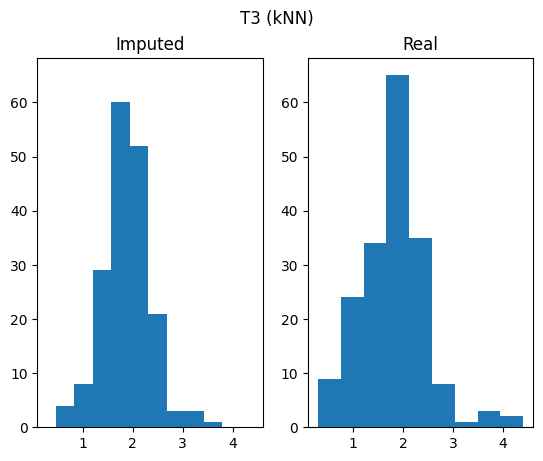

None

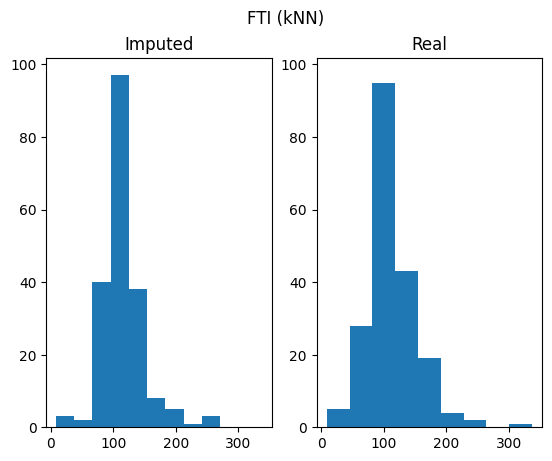

None

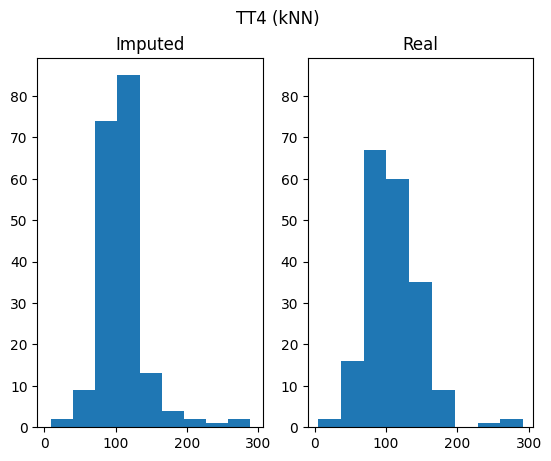

None

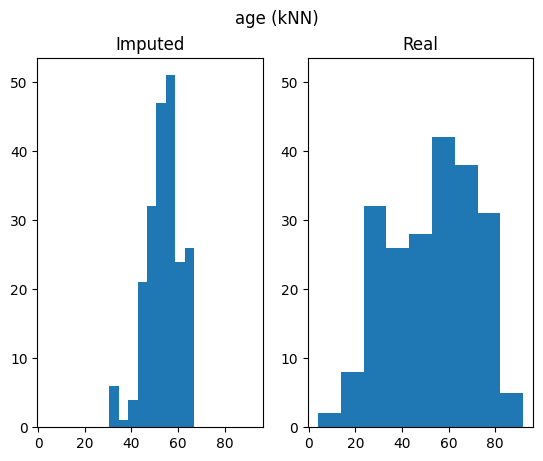

None

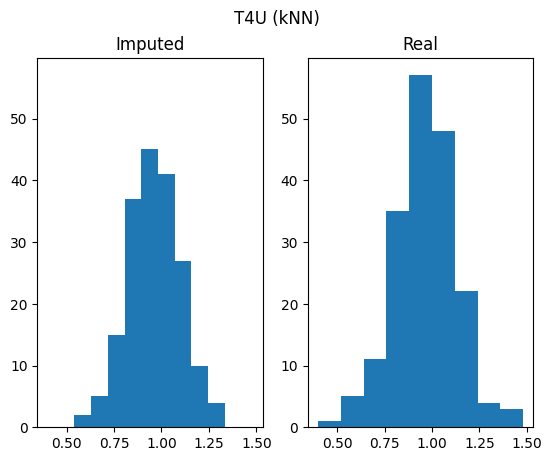

None

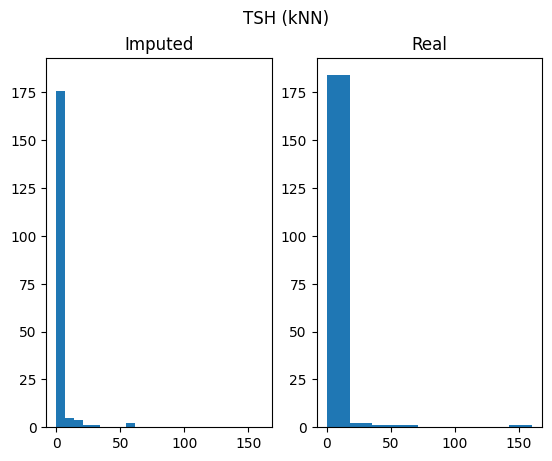

None

In [19]:
imputed_dict, real_dict = imputed_vals(sel_qual_cols, knn_imputed_df)
for col in sel_qual_cols:
    if col not in sel_cat_cols:
        _, ax = plt.subplots(1, 2)
        ax[0].hist(x=imputed_dict[col], bins=sturges(len(imputed_dict[col])))
        ax[1].hist(x=real_dict[col], bins=sturges(len(real_dict[col])))
        imputed_ylim = ax[0].get_ylim()
        real_ylim = ax[1].get_ylim()
        true_ylim_max = max([imputed_ylim[1], real_ylim[1]])
        real_xlim = ax[1].get_xlim()
        min_val = real_xlim[0]
        max_val = real_xlim[1]
        ax[0].set_xlim((min_val, max_val))
        ax[1].set_xlim((min_val, max_val))
        ax[0].set_ylim((0, true_ylim_max))
        ax[1].set_ylim((0, true_ylim_max))
        ax[0].set_title("Imputed")
        ax[1].set_title("Real")
        plt.suptitle(col + " (kNN)")
        display(plt.show())

## WKNN

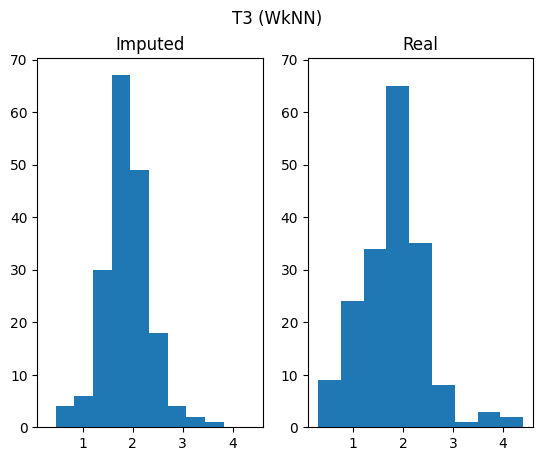

None

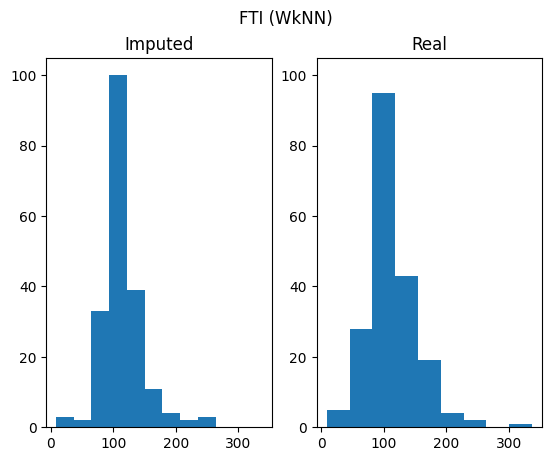

None

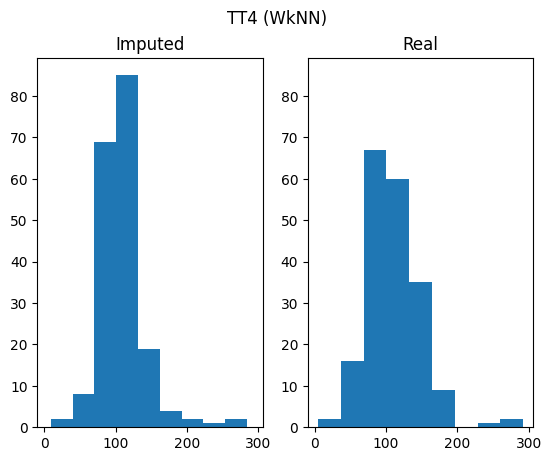

None

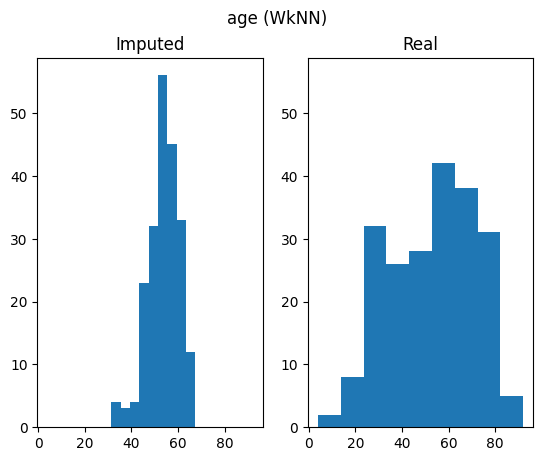

None

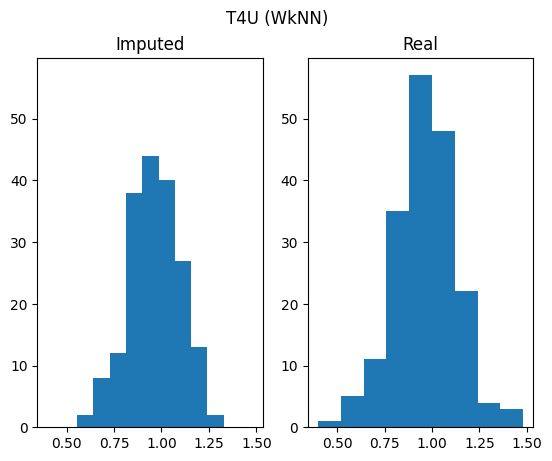

None

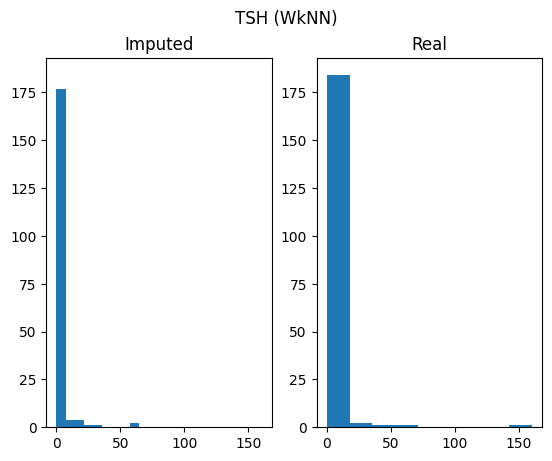

None

In [20]:
imputed_dict, real_dict = imputed_vals(sel_qual_cols, wknn_imputed_df)
for col in sel_qual_cols:
    if col not in sel_cat_cols:
        _, ax = plt.subplots(1, 2)
        ax[0].hist(x=imputed_dict[col], bins=sturges(len(imputed_dict[col])))
        ax[1].hist(x=real_dict[col], bins=sturges(len(real_dict[col])))
        imputed_ylim = ax[0].get_ylim()
        real_ylim = ax[1].get_ylim()
        true_ylim_max = max([imputed_ylim[1], real_ylim[1]])
        real_xlim = ax[1].get_xlim()
        min_val = real_xlim[0]
        max_val = real_xlim[1]
        ax[0].set_xlim((min_val, max_val))
        ax[1].set_xlim((min_val, max_val))
        ax[0].set_ylim((0, true_ylim_max))
        ax[1].set_ylim((0, true_ylim_max))
        ax[0].set_title("Imputed")
        ax[1].set_title("Real")
        plt.suptitle(col + " (WkNN)")
        display(plt.show())

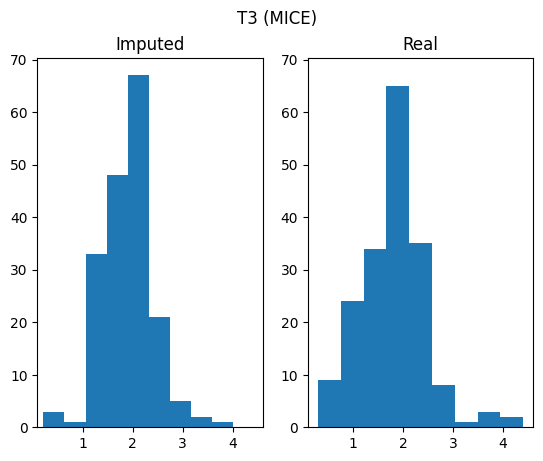

None

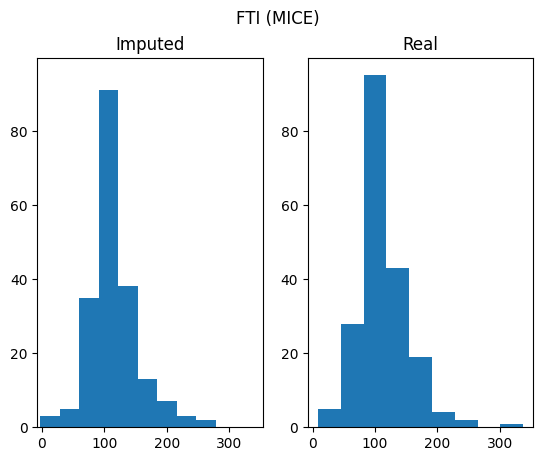

None

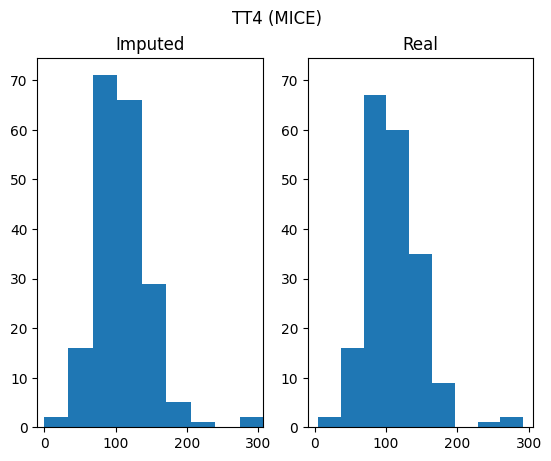

None

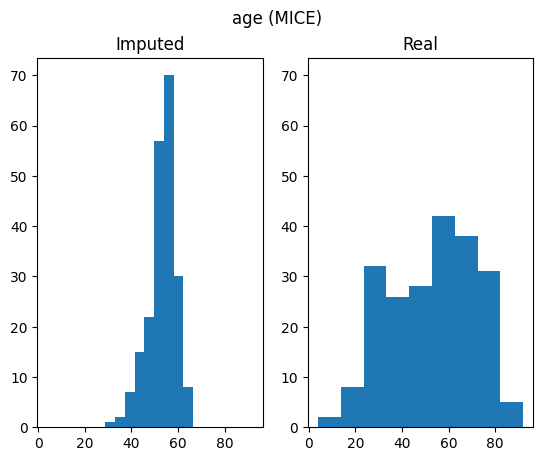

None

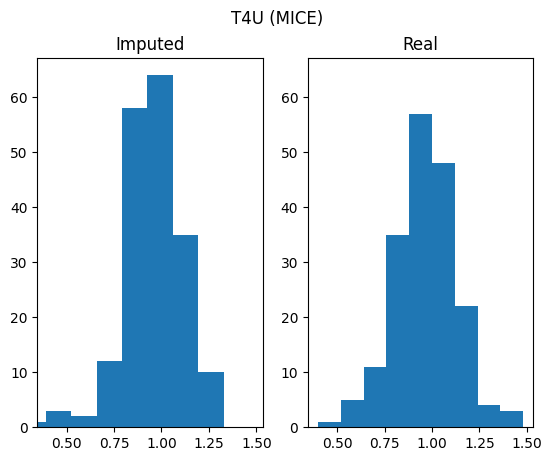

None

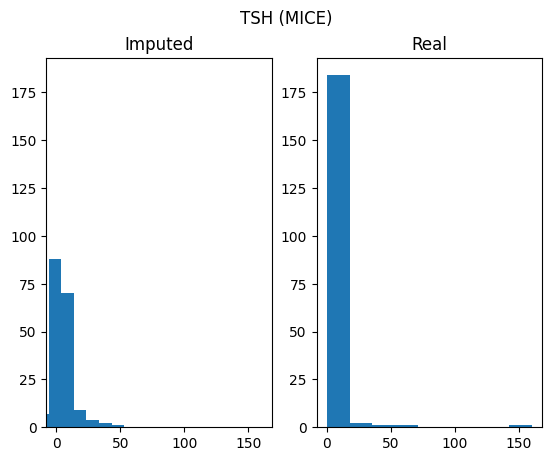

None

In [21]:
imputed_dict, real_dict = imputed_vals(sel_qual_cols, mice_imputed_df)
for col in sel_qual_cols:
    if col not in sel_cat_cols:
        _, ax = plt.subplots(1, 2)
        ax[0].hist(x=imputed_dict[col], bins=sturges(len(imputed_dict[col])))
        ax[1].hist(x=real_dict[col], bins=sturges(len(real_dict[col])))
        imputed_ylim = ax[0].get_ylim()
        real_ylim = ax[1].get_ylim()
        true_ylim_max = max([imputed_ylim[1], real_ylim[1]])
        real_xlim = ax[1].get_xlim()
        min_val = real_xlim[0]
        max_val = real_xlim[1]
        ax[0].set_xlim((min_val, max_val))
        ax[1].set_xlim((min_val, max_val))
        ax[0].set_ylim((0, true_ylim_max))
        ax[1].set_ylim((0, true_ylim_max))
        ax[0].set_title("Imputed")
        ax[1].set_title("Real")
        plt.suptitle(col + " (MICE)")
        display(plt.show())

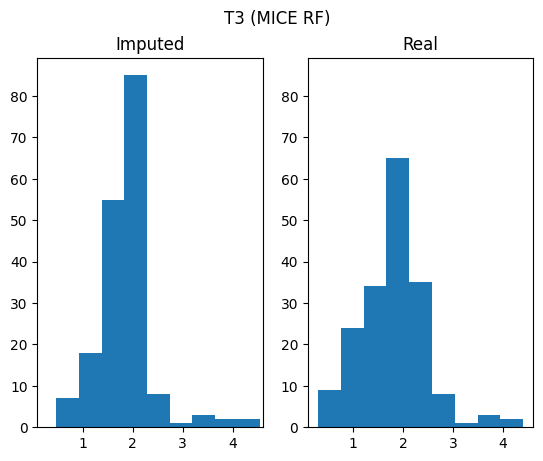

None

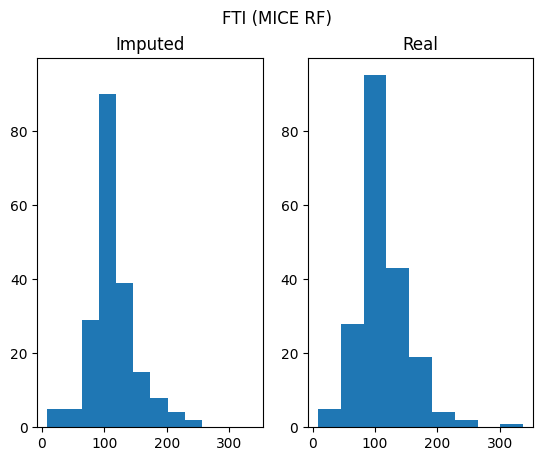

None

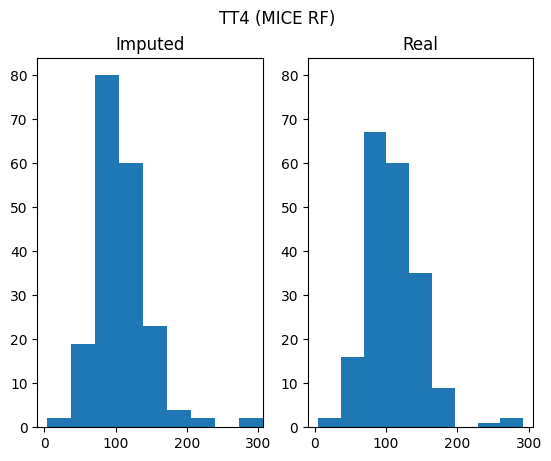

None

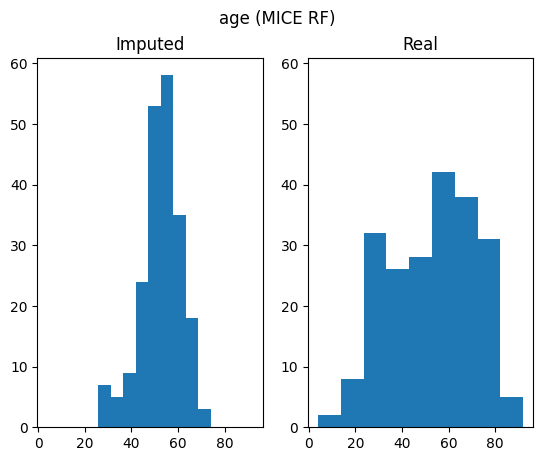

None

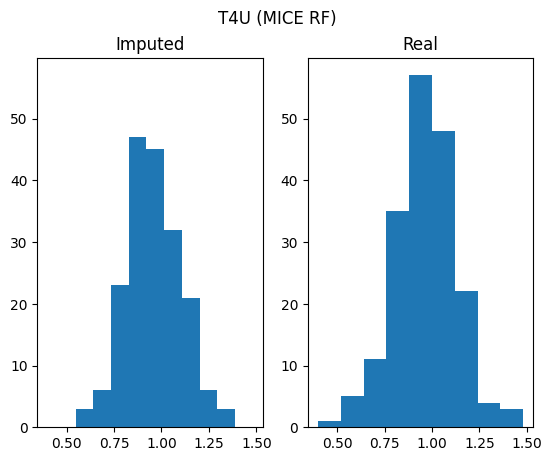

None

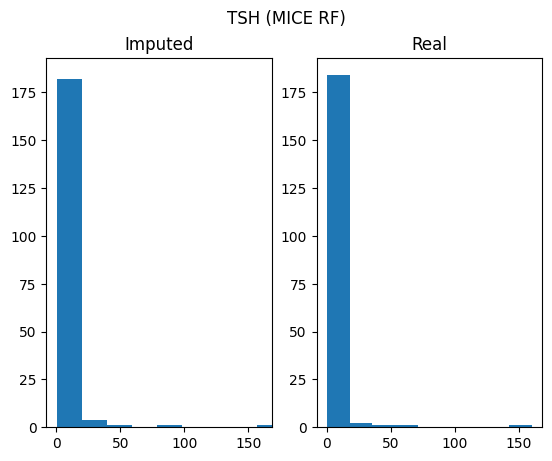

None

In [22]:
imputed_dict, real_dict = imputed_vals(sel_qual_cols, mice_rf_imputed_df)
for col in sel_qual_cols:
    if col not in sel_cat_cols:
        _, ax = plt.subplots(1, 2)
        ax[0].hist(x=imputed_dict[col], bins=sturges(len(imputed_dict[col])))
        ax[1].hist(x=real_dict[col], bins=sturges(len(real_dict[col])))
        imputed_ylim = ax[0].get_ylim()
        real_ylim = ax[1].get_ylim()
        true_ylim_max = max([imputed_ylim[1], real_ylim[1]])
        real_xlim = ax[1].get_xlim()
        min_val = real_xlim[0]
        max_val = real_xlim[1]
        ax[0].set_xlim((min_val, max_val))
        ax[1].set_xlim((min_val, max_val))
        ax[0].set_ylim((0, true_ylim_max))
        ax[1].set_ylim((0, true_ylim_max))
        ax[0].set_title("Imputed")
        ax[1].set_title("Real")
        plt.suptitle(col + " (MICE RF)")
        display(plt.show())

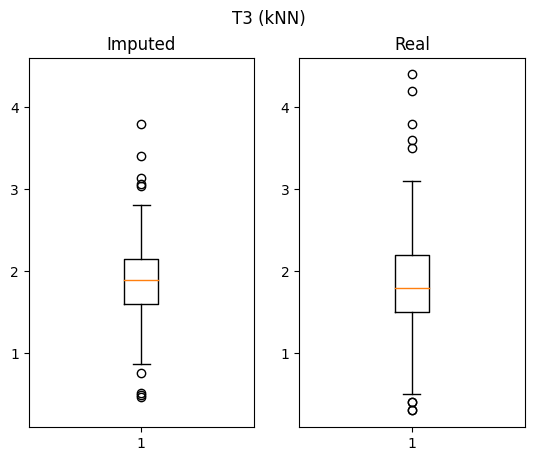

None

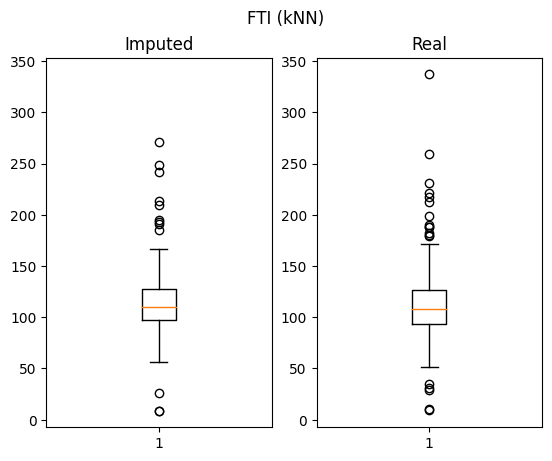

None

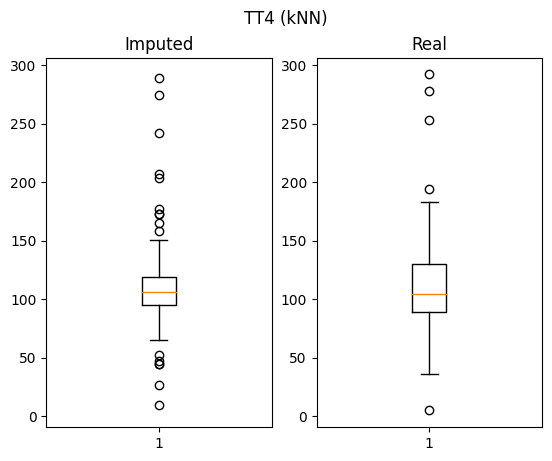

None

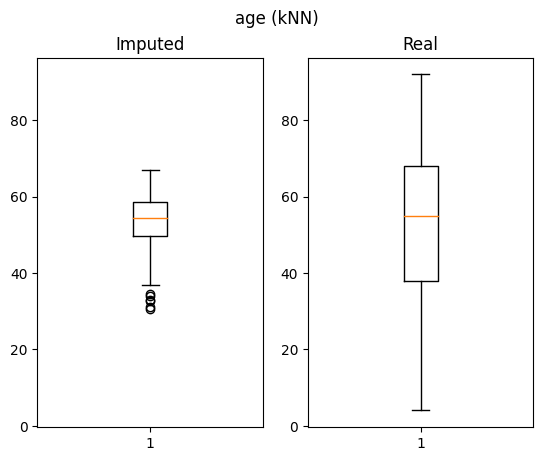

None

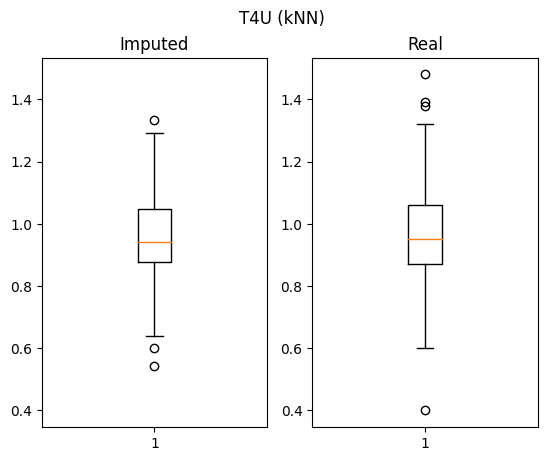

None

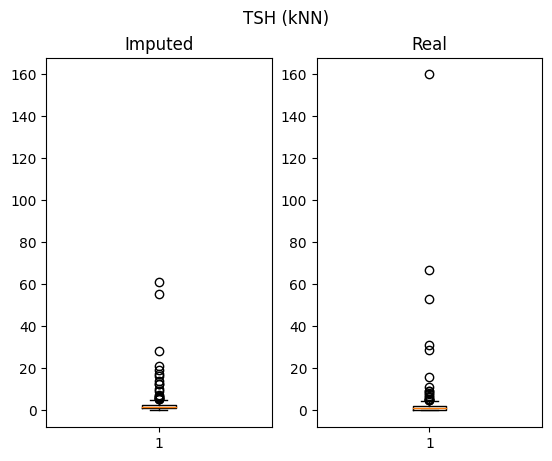

None

In [23]:
imputed_dict, real_dict = imputed_vals(sel_qual_cols, knn_imputed_df)
for col in sel_qual_cols:
    if col not in sel_cat_cols:
        _, ax = plt.subplots(1, 2)
        ax[0].boxplot(x=imputed_dict[col])
        ax[1].boxplot(x=real_dict[col])
        imputed_ylim = ax[0].get_ylim()
        real_ylim = ax[1].get_ylim()
        ylim_min = min([imputed_ylim[0], real_ylim[0]])
        ylim_max = max([imputed_ylim[1], real_ylim[1]])
        ax[0].set_ylim((ylim_min, ylim_max))
        ax[1].set_ylim((ylim_min, ylim_max))
        ax[0].set_title("Imputed")
        ax[1].set_title("Real")
        plt.suptitle(col + " (kNN)")
        display(plt.show())

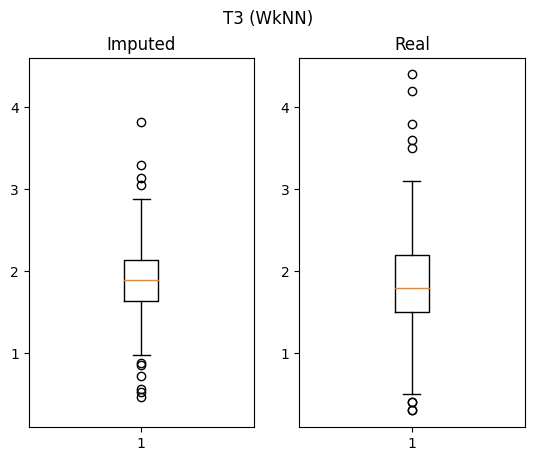

None

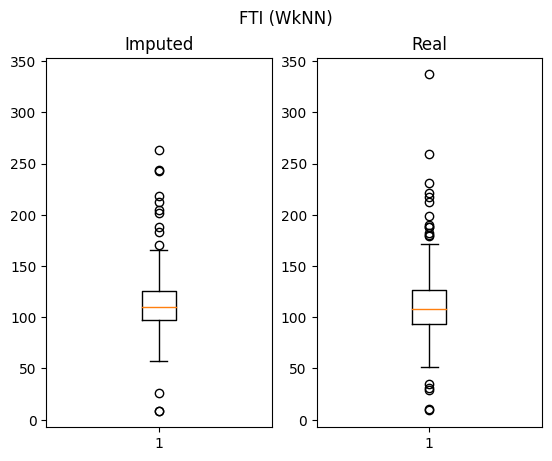

None

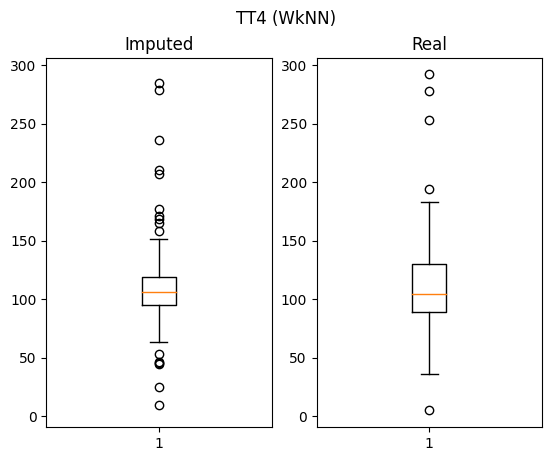

None

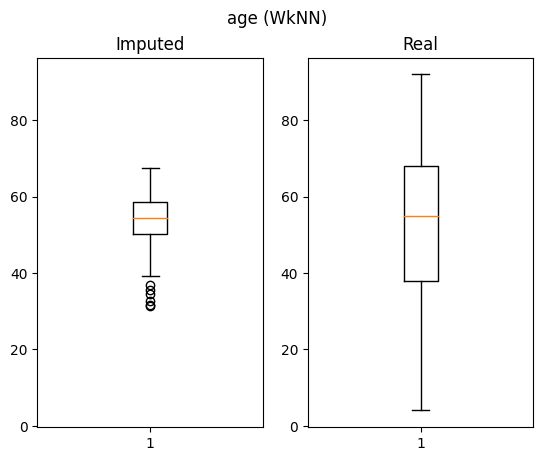

None

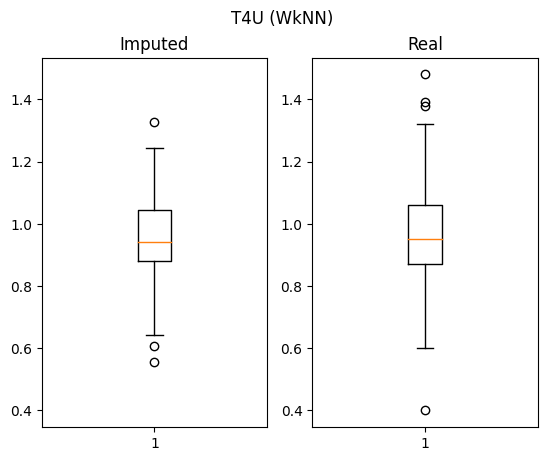

None

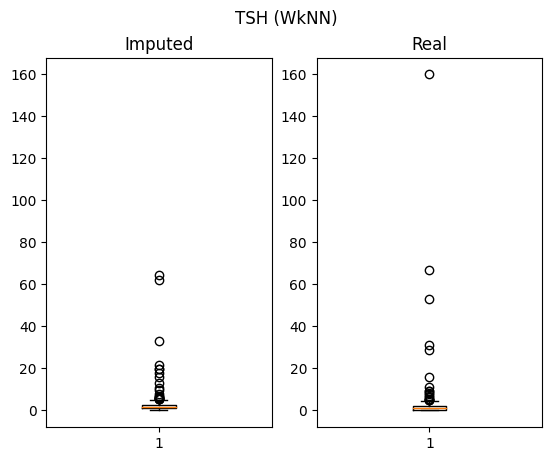

None

In [24]:
imputed_dict, real_dict = imputed_vals(sel_qual_cols, wknn_imputed_df)
for col in sel_qual_cols:
    if col not in sel_cat_cols:
        _, ax = plt.subplots(1, 2)
        ax[0].boxplot(x=imputed_dict[col])
        ax[1].boxplot(x=real_dict[col])
        imputed_ylim = ax[0].get_ylim()
        real_ylim = ax[1].get_ylim()
        ylim_min = min([imputed_ylim[0], real_ylim[0]])
        ylim_max = max([imputed_ylim[1], real_ylim[1]])
        ax[0].set_ylim((ylim_min, ylim_max))
        ax[1].set_ylim((ylim_min, ylim_max))
        ax[0].set_title("Imputed")
        ax[1].set_title("Real")
        plt.suptitle(col + " (WkNN)")
        display(plt.show())

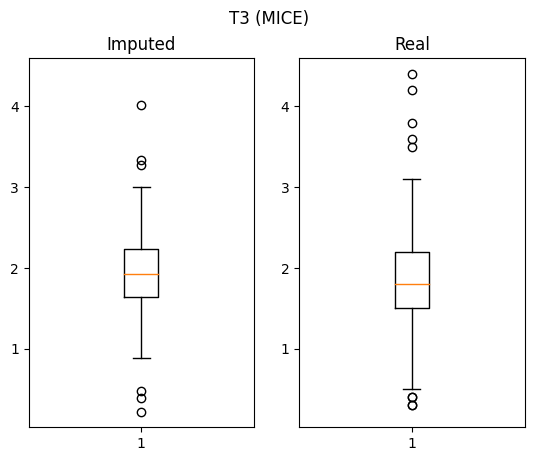

None

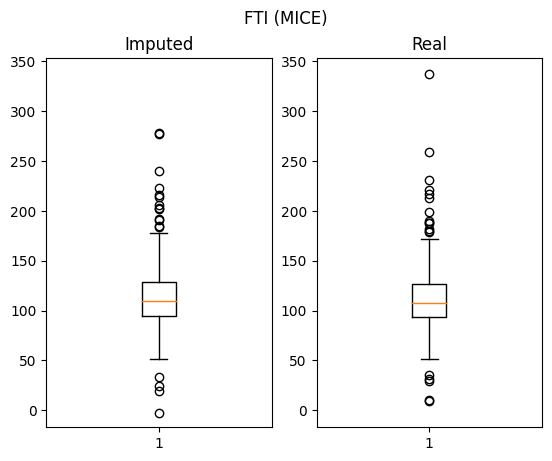

None

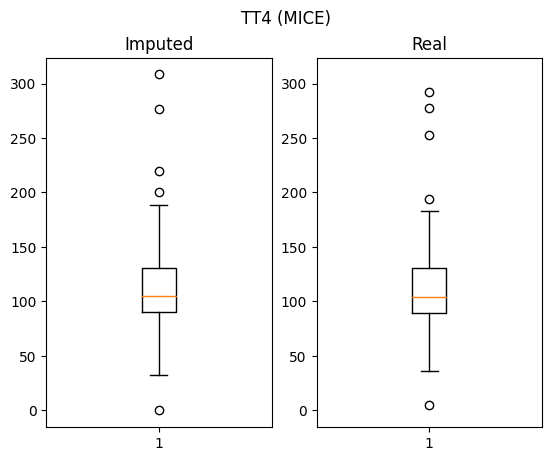

None

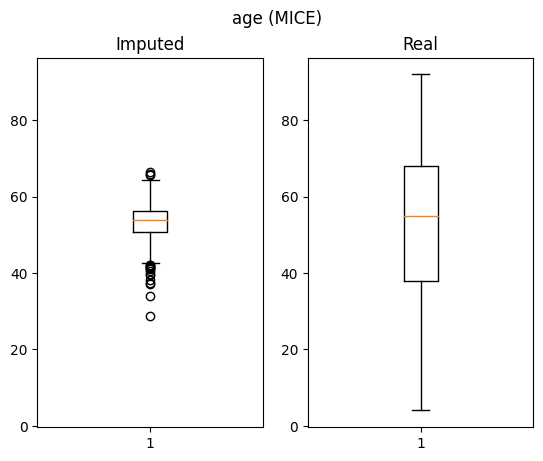

None

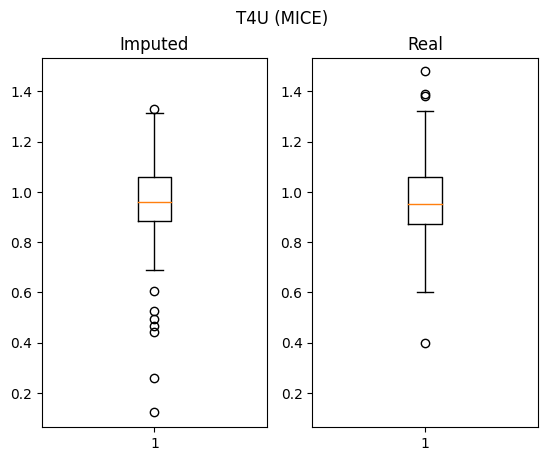

None

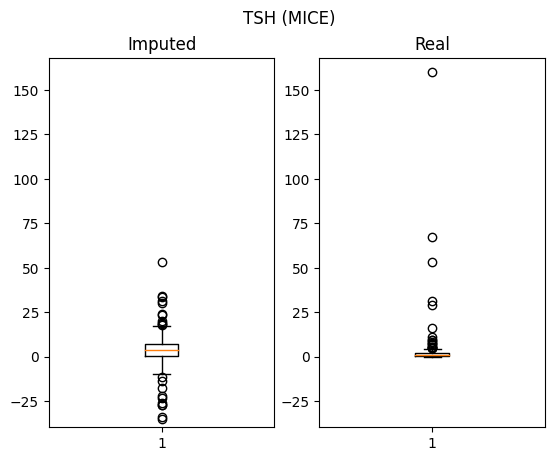

None

In [25]:
imputed_dict, real_dict = imputed_vals(sel_qual_cols, mice_imputed_df)
for col in sel_qual_cols:
    if col not in sel_cat_cols:
        _, ax = plt.subplots(1, 2)
        ax[0].boxplot(x=imputed_dict[col])
        ax[1].boxplot(x=real_dict[col])
        imputed_ylim = ax[0].get_ylim()
        real_ylim = ax[1].get_ylim()
        ylim_min = min([imputed_ylim[0], real_ylim[0]])
        ylim_max = max([imputed_ylim[1], real_ylim[1]])
        ax[0].set_ylim((ylim_min, ylim_max))
        ax[1].set_ylim((ylim_min, ylim_max))
        ax[0].set_title("Imputed")
        ax[1].set_title("Real")
        plt.suptitle(col + " (MICE)")
        display(plt.show())

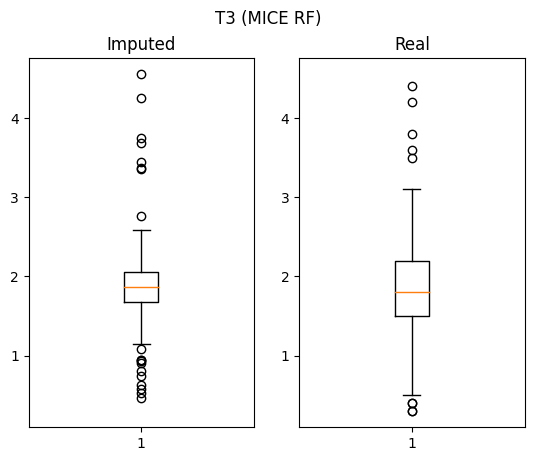

None

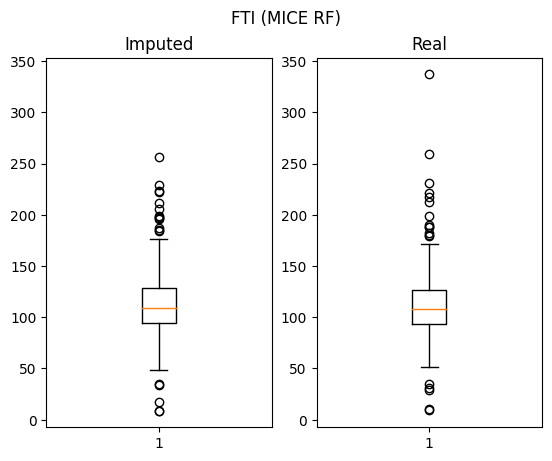

None

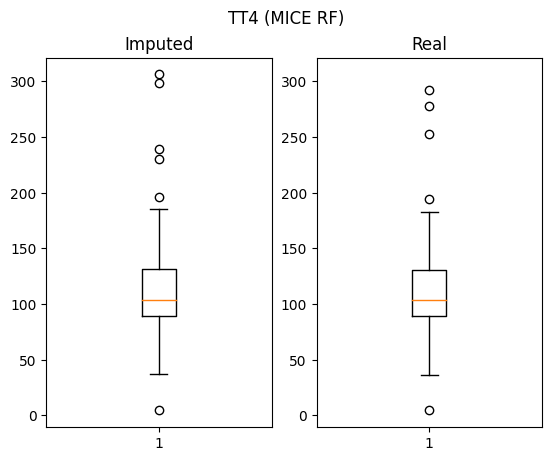

None

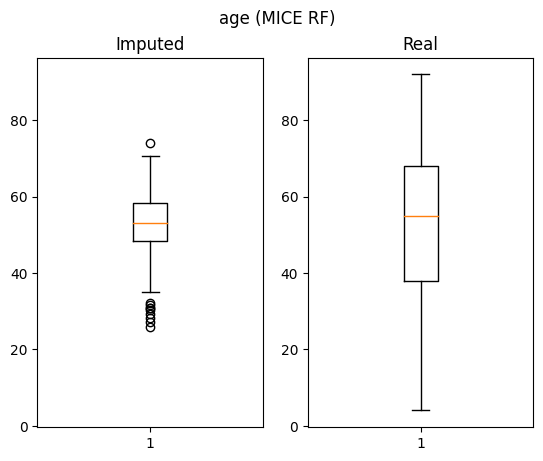

None

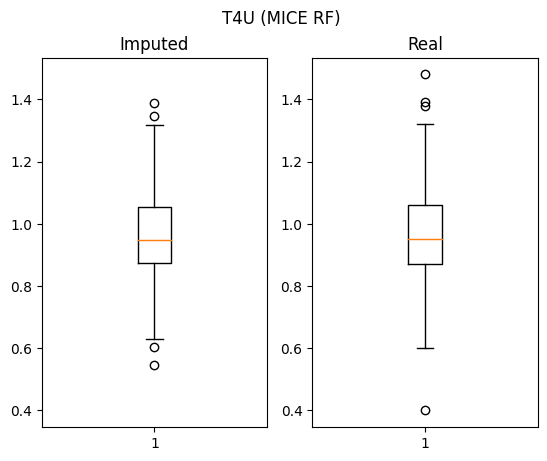

None

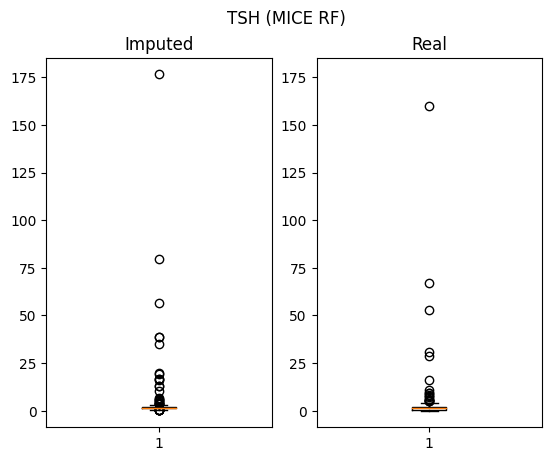

None

In [26]:
imputed_dict, real_dict = imputed_vals(sel_qual_cols, mice_rf_imputed_df)
for col in sel_qual_cols:
    if col not in sel_cat_cols:
        _, ax = plt.subplots(1, 2)
        ax[0].boxplot(x=imputed_dict[col])
        ax[1].boxplot(x=real_dict[col])
        imputed_ylim = ax[0].get_ylim()
        real_ylim = ax[1].get_ylim()
        ylim_min = min([imputed_ylim[0], real_ylim[0]])
        ylim_max = max([imputed_ylim[1], real_ylim[1]])
        ax[0].set_ylim((ylim_min, ylim_max))
        ax[1].set_ylim((ylim_min, ylim_max))
        ax[0].set_title("Imputed")
        ax[1].set_title("Real")
        plt.suptitle(col + " (MICE RF)")
        display(plt.show())

In [27]:
imputed_sqr_err(sel_qual_cols, knn_imputed_df)

{'T3': 0.32156573214157846,
 'FTI': 442.3976569963297,
 'TT4': 595.4550587266211,
 'age': 375.83310525645885,
 'T4U': 0.0020842648366171195,
 'TSH': 95.03187328111036}

In [28]:
imputed_sqr_err(sel_qual_cols, wknn_imputed_df)

{'T3': 0.3155473259668508,
 'FTI': 426.85245939086286,
 'TT4': 597.7414317708333,
 'age': 369.38707547169815,
 'T4U': 0.00216447591397849,
 'TSH': 94.72854200892851}

In [29]:
imputed_sqr_err(sel_qual_cols, mice_imputed_df)

{'T3': 0.2937019012706759,
 'FTI': 71.7963441818284,
 'TT4': 88.44405932735555,
 'age': 308.7712938319279,
 'T4U': 0.004002919761379687,
 'TSH': 148.40942463737042}

In [30]:
display(knn_imputed_df[real_cols].mean())
display(knn_imputed_df[imputed_cols].mean())

T3 (real)       1.948487
FTI (real)    113.440277
TT4 (real)    108.774417
age (real)     54.412273
T4U (real)      0.973673
TSH (real)      4.889823
dtype: float64

T3 (imputed)       1.958591
FTI (imputed)    113.606351
TT4 (imputed)    108.616487
age (imputed)     54.580947
T4U (imputed)      0.973797
TSH (imputed)      4.879831
dtype: float64

In [31]:
display(knn_imputed_df[real_cols].std())
display(knn_imputed_df[imputed_cols].std())

T3 (real)      0.787096
FTI (real)    38.032258
TT4 (real)    37.283235
age (real)    18.378102
T4U (real)     0.189116
TSH (real)    23.853609
dtype: float64

T3 (imputed)      0.765984
FTI (imputed)    36.855839
TT4 (imputed)    36.504443
age (imputed)    16.906258
T4U (imputed)     0.186136
TSH (imputed)    23.394117
dtype: float64

In [32]:
display(wknn_imputed_df[real_cols].mean())
display(wknn_imputed_df[imputed_cols].mean())

T3 (real)       1.948487
FTI (real)    113.440277
TT4 (real)    108.774417
age (real)     54.412273
T4U (real)      0.973673
TSH (real)      4.889823
dtype: float64

T3 (imputed)       1.958119
FTI (imputed)    113.598989
TT4 (imputed)    108.618902
age (imputed)     54.590320
T4U (imputed)      0.973683
TSH (imputed)      4.897615
dtype: float64

In [33]:
display(wknn_imputed_df[real_cols].std())
display(wknn_imputed_df[imputed_cols].std())

T3 (real)      0.787096
FTI (real)    38.032258
TT4 (real)    37.283235
age (real)    18.378102
T4U (real)     0.189116
TSH (real)    23.853609
dtype: float64

T3 (imputed)      0.764802
FTI (imputed)    36.863553
TT4 (imputed)    36.488928
age (imputed)    16.876707
T4U (imputed)     0.185833
TSH (imputed)    23.420733
dtype: float64